Inspiration:
- [Berlin Marathons](https://medium.com/@moralescas/berlin-marathon-data-1974-2023-fd18f420906f)

Questions to be answered:
- **Olympic Marathon**
    - Which country won the most medals
- **NYC Marathon**
    - Difference between male and female times
    - Country with most winners
    - avg time per country
- **Berlin Marathon**
    - Where do most runners come from?
    - Where are the shortest times from?
    - Are these two places the same?
    - How did each country perform?
    - How have finishing times changed over the years?
    - How has the fastest time changed over the years?
- **Boston Marathon**:
    - how age affects race time
        - Fastest time per age group
    - difference in gender race times
- **Boston Marathon winners**:
    - Country with most winners
        - Show this on the map to show how geography can affect the outcomes
    - Avg time per country
    - Look at ¿avg? difference in time between men and women
- **Other**:
    - Does location of race affect times


Sources:
- [Berlin Marathon Data](https://www.kaggle.com/datasets/aiaiaidavid/berlin-marathons-data)
- [NYC Marathons](https://www.openintro.org/data/index.php?data=nyc_marathon)
- [Boston Marathon Data](https://data.scorenetwork.org/running/boston_marathon_2023.html)
- [Boston Marathon Winners Data](https://www.kaggle.com/datasets/zhikchen/boston-marathon-winners-men-and-women)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
pn.extension('tabulator')

import hvplot.pandas

In [2]:
#files
#format: year, name, country, time, time_hrs, division[sex], note
#(only winners)
nyc_marathon = pd.read_csv('1_running_datasets/nyc_marathon.csv')

#format: year, location, Gold_Name, Gold_Country, Silver_Name, Silver_Country, Bronze_Name, Bronze_Country
#(only winners)
olympic_marathon = pd.read_csv('1_running_datasets/Olympic_Games.csv').drop(columns='Unnamed: 0')

#format: country, Gold, Silver, Bronze, Total
#(only winners)
olympic_country_medals = pd.read_csv('1_running_datasets/Olympic_Country_Medals.csv')

#format: year, country, gender, age, time
#(all participants)
berlin_marathon = pd.read_csv('1_running_datasets/berlin_marathon_1974_2023.csv')

#format: age_group, place_overall, place_gender, place_division, name, team, bib_number, half_time, finish_net, finish_gun, gender, half_time_sec, finish_net_sec, finish_gun_sec, finish_net_,minutes
#new format: name, age_group, place_gender, finish_net, finish_net_sed, finish_net_hour
#(all participants)(no country)
boston_marathon_2023 = pd.read_csv('1_running_datasets/boston_marathon_2023.csv')[['name', 'age_group', 'place_gender', 'finish_net', 'finish_net_sec']]
boston_marathon_2023['finish_net_hour'] = boston_marathon_2023['finish_net_sec']/3600
boston_marathon_2023

#format: Year, Winner, Country, Time, Distance(Miles), Distance(KM)
mens_boston_marathon_winners = pd.read_csv('1_running_datasets/Mens_Boston_Marathon_Winners.csv')
womens_boston_marathon_winners = pd.read_csv('1_running_datasets/Womens_Boston_Marathon_Winners.csv')

/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_49671/3334841572.py:16: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  berlin_marathon = pd.read_csv('1_running_datasets/berlin_marathon_1974_2023.csv')


In [96]:
nyc_marathon_men = nyc_marathon.loc[nyc_marathon['division'] == 'Men']
nyc_marathon_women = nyc_marathon.loc[nyc_marathon['division'] == 'Women']

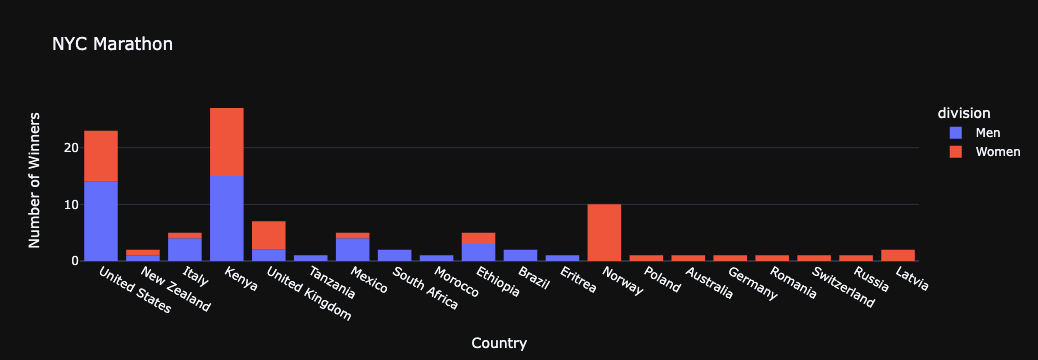

In [103]:
fig = px.histogram(nyc_marathon, x = 'country', 
             color = 'division',
             title = 'NYC Marathon',
             category_orders={'country': df['country'].value_counts().index},
             template='plotly_dark',
             labels = {'country':'Country', 'count': 'Number of Winners'},
            )
fig.update_yaxes(title_text='Number of Winners')


year                 name         country      time  time_hrs division  \
0    1970         Gary Muhrcke   United States  02:31:38  2.527222      Men   
1    1970                  NaN             NaN       NaN       NaN    Women   
2    1971       Norman Higgins   United States  02:22:54  2.381667      Men   
3    1971          Beth Bonner   United States  02:55:22  2.922778    Women   
4    1972       Sheldon Karlin   United States  02:27:52  2.464444      Men   
..    ...                  ...             ...       ...       ...      ...   
97   2018         Mary Keitany           Kenya  02:22:48  2.380000    Women   
98   2019    Geoffrey Kamworor           Kenya  02:08:13  2.136944      Men   
99   2019  Joyciline Jepkosgei           Kenya  02:22:38  2.377222    Women   
100  2020          Kevin Quinn  United Kingdom  02:23:48  2.396667      Men   
101  2020      Stephanie Bruce   United States  02:35:28  2.591111    Women   

                                       note  
0                             Course record  
1                        No woman finishers  
2                             Course record  
3                              World record  
4                                       NaN  
..                                      ...  
97                           Fourth victory  
98                           Second victory  
99                                      NaN  
100  Virtual event held due to the COVID-19  
101  Virtual event held due to the COVID-19  

[102 rows x 7 columns]